In [146]:
def grid_dicto_to_df_list(grid_list):
    list_to_df = []
    non_metrics = ['proba_outputs', 'actual_classes', 'proba_outputs', 'actual_classes', 'test_proba', 'test_actual_classes']
    for dict_hyper in grid_list:
        dict_to_df = {}
        # print(dict_hyper)
        for val in dict_hyper.values():
            for item in val.items():
                if type(item[1]) != dict:
                    dict_to_df[item[0]] = item[1]
                else:
                    dictionary_results = item[1]
                    for item in dictionary_results.items(): 
                        if item[0] not in non_metrics:
                            dict_to_df[item[0]] = item[1]
        list_to_df.append(dict_to_df)
    return list_to_df

# Initial grid analysis of INDIVIDUAL DETERMINANT models

In [147]:
import pandas as pd 
import json
import pprint

In [148]:
with open("grid_results_determinants_individual.json") as f:
    grids = json.load(f)

In [149]:
len(grids)

9

In [150]:
list_to_df = grid_dicto_to_df_list(grids)

In [151]:
df = pd.DataFrame(list_to_df)

In [152]:
# pprint.pprint(list(df.columns))

In [153]:
df.head()

,max-len,learning_rate,batch_size,num_train_epochs,n_epochs,train_loss_epoch_1,valid_loss_epoch_1,f1_epoch_1,accuracy_epoch_1,roc_auc_epoch_1,...,accuracy_epoch_14,roc_auc_epoch_14,hamming_epoch_14,proba_outputs_epoch_14,actual_classes_epoch_14,test_loss,test_f1,test_roc_auc,test_hamming,test_accuracy
0,128,0.00002,8,14,15,0.012611,0.070722,0.315789,0.250000,0.602192,...,0.333333,0.634606,0.061728,"[[[0.02805124595761299, 0.01598079316318035, 0...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.069446,0.285714,0.598310,0.069444,0.25
1,128,0.00002,12,14,15,0.020609,0.143677,0.346667,0.361111,0.638260,...,0.277778,0.614097,0.058642,"[[[0.056838832795619965, 0.040381889790296555,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.097712,0.303030,0.601277,0.063889,0.25
2,128,0.00002,16,14,15,0.027929,0.154011,0.323529,0.277778,0.618576,...,0.222222,0.590288,0.061728,"[[[0.05006634071469307, 0.04769202694296837, 0...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.113145,0.363636,0.624500,0.058333,0.30
3,128,0.00003,8,14,15,0.010827,0.056068,0.000000,0.000000,0.500000,...,0.333333,0.661716,0.052469,"[[[0.015534669160842896, 0.009569521993398666,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.064070,0.363636,0.624500,0.058333,0.25
4,128,0.00003,12,14,15,0.018558,0.113339,0.000000,0.000000,0.500000,...,0.361111,0.660891,0.054012,"[[[0.022346261888742447, 0.015515814535319805,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.093663,0.342857,0.621533,0.063889,0.25


## Comparing model performance

In [154]:
cols_comparison = ["learning_rate", "batch_size" , "train_loss_epoch_14", "valid_loss_epoch_14", "f1_epoch_14", "test_loss", "test_f1", "test_hamming"]
df[cols_comparison].sort_values(["test_loss"], ascending=True)

,learning_rate,batch_size,train_loss_epoch_14,valid_loss_epoch_14,f1_epoch_14,test_loss,test_f1,test_hamming
3,0.00003,8,0.002068,0.039187,0.451613,0.064070,0.363636,0.058333
0,0.00002,8,0.003601,0.040578,0.375000,0.069446,0.285714,0.069444
6,0.00005,8,0.001423,0.039821,0.507463,0.071454,0.315789,0.072222
4,0.00003,12,0.004413,0.055813,0.444444,0.093663,0.342857,0.063889
1,0.00002,12,0.006030,0.058668,0.344828,0.097712,0.303030,0.063889
7,0.00005,12,0.003327,0.059746,0.484848,0.102144,0.333333,0.066667
2,0.00002,16,0.007666,0.074256,0.285714,0.113145,0.363636,0.058333
5,0.00003,16,0.006200,0.073092,0.366667,0.116265,0.363636,0.058333
8,0.00005,16,0.005776,0.071411,0.333333,0.118486,0.076923,0.066667


## Evaluating hyperparameters

In [155]:
df.pivot_table(["train_loss_epoch_14", "valid_loss_epoch_14"], index = "learning_rate", columns="batch_size")

train_loss_epoch_14                     valid_loss_epoch_14  \
batch_size                     8         12        16                  8    
learning_rate                                                               
0.00002                  0.003601  0.006030  0.007666            0.040578   
0.00003                  0.002068  0.004413  0.006200            0.039187   
0.00005                  0.001423  0.003327  0.005776            0.039821   

                                   
batch_size           12        16  
learning_rate                      
0.00002        0.058668  0.074256  
0.00003        0.055813  0.073092  
0.00005        0.059746  0.071411

<!-- We can see that generally the lower the batch size the faster a model will learn and the better a model will perform.

We can scratch bath size 64 since we would need a higher learning rate and we may lose control of the pace of learning.  -->

In [156]:
df.pivot_table(["train_loss_epoch_14", "valid_loss_epoch_14", "val_hamming"], index = "learning_rate", columns="batch_size")

#  Hamming loss is the fraction of labels that are incorrectly predicted

train_loss_epoch_14                     val_hamming            \
batch_size                     8         12        16          8         12   
learning_rate                                                                 
0.00002                  0.003601  0.006030  0.007666    0.058642  0.058642   
0.00003                  0.002068  0.004413  0.006200    0.047840  0.055556   
0.00005                  0.001423  0.003327  0.005776    0.054012  0.055556   

                        valid_loss_epoch_14                      
batch_size           16                  8         12        16  
learning_rate                                                    
0.00002        0.058642            0.040578  0.058668  0.074256  
0.00003        0.060185            0.039187  0.055813  0.073092  
0.00005        0.054012            0.039821  0.059746  0.071411

# Initial grid analysis of INDIVIDUAL CONTENT models

In [157]:
with open("grid_results_contents_individual.json") as f:
    grids = json.load(f)

In [158]:
len(grids)

18

In [159]:
grids = grids[-9:]
len(grids)

9

In [160]:
list_to_df = grid_dicto_to_df_list(grids)

In [161]:
df = pd.DataFrame(list_to_df)

In [162]:
df.columns

Index(['max-len', 'learning_rate', 'batch_size', 'num_train_epochs',
       'n_epochs', 'train_loss_epoch_1', 'valid_loss_epoch_1', 'f1_epoch_1',
       'accuracy_epoch_1', 'roc_auc_epoch_1',
       ...
       'accuracy_epoch_14', 'roc_auc_epoch_14', 'hamming_epoch_14',
       'proba_outputs_epoch_14', 'actual_classes_epoch_14', 'test_loss',
       'test_f1', 'test_roc_auc', 'test_hamming', 'test_accuracy'],
      dtype='object', length=129)

In [163]:
df.head()

,max-len,learning_rate,batch_size,num_train_epochs,n_epochs,train_loss_epoch_1,valid_loss_epoch_1,f1_epoch_1,accuracy_epoch_1,roc_auc_epoch_1,...,accuracy_epoch_14,roc_auc_epoch_14,hamming_epoch_14,proba_outputs_epoch_14,actual_classes_epoch_14,test_loss,test_f1,test_roc_auc,test_hamming,test_accuracy
0,128,0.00002,8,14,15,0.013059,0.060024,0.000000,0.00000,0.500000,...,0.170732,0.583691,0.037940,"[[[0.045712102204561234, 0.03578242287039757, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.041735,0.375000,0.623325,0.032206,0.217391
1,128,0.00002,12,14,15,0.022386,0.118099,0.087912,0.04878,0.523685,...,0.121951,0.562886,0.038844,"[[[0.04294946789741516, 0.03628834709525108, 0...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.066843,0.352941,0.621650,0.035427,0.217391
2,128,0.00002,16,14,15,0.028416,0.150349,0.000000,0.00000,0.499057,...,0.073171,0.530971,0.041554,"[[[0.06074479967355728, 0.03640878200531006, 0...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.070685,0.333333,0.603329,0.032206,0.173913
3,128,0.00003,8,14,15,0.012464,0.050725,0.000000,0.00000,0.500000,...,0.146341,0.583691,0.037940,"[[[0.017957378178834915, 0.01750374212861061, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.033259,0.457143,0.664154,0.030596,0.304348
4,128,0.00003,12,14,15,0.020290,0.095651,0.000000,0.00000,0.500000,...,0.121951,0.563358,0.037940,"[[[0.04086542874574661, 0.03246527910232544, 0...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.059140,0.437500,0.644996,0.028986,0.260870


## Comparing model performance

In [164]:
cols_comparison = ["learning_rate", "batch_size" , "train_loss_epoch_14", "valid_loss_epoch_14", "f1_epoch_14", "test_loss", "test_accuracy", "test_f1", "test_hamming"]
df[cols_comparison].sort_values("test_loss", ascending=True)

,learning_rate,batch_size,train_loss_epoch_14,valid_loss_epoch_14,f1_epoch_14,test_loss,test_accuracy,test_f1,test_hamming
6,0.00005,8,0.001978,0.017364,0.493151,0.029175,0.434783,0.577778,0.030596
3,0.00003,8,0.002871,0.020008,0.275862,0.033259,0.304348,0.457143,0.030596
0,0.00002,8,0.003716,0.023577,0.275862,0.041735,0.217391,0.375000,0.032206
7,0.00005,12,0.003703,0.028062,0.437500,0.042689,0.434783,0.666667,0.022544
8,0.00005,16,0.005484,0.040583,0.492308,0.048579,0.434783,0.631579,0.022544
4,0.00003,12,0.005291,0.035016,0.222222,0.059140,0.260870,0.437500,0.028986
1,0.00002,12,0.005903,0.038378,0.218182,0.066843,0.217391,0.352941,0.035427
5,0.00003,16,0.008575,0.051646,0.000000,0.069847,0.173913,0.333333,0.032206
2,0.00002,16,0.008648,0.051685,0.115385,0.070685,0.173913,0.333333,0.032206


## Evaluating hyperparameters


In [165]:
df.pivot_table(["train_loss_epoch_14", "valid_loss_epoch_14"], index = "learning_rate", columns="batch_size")

train_loss_epoch_14                     valid_loss_epoch_14  \
batch_size                     8         12        16                  8    
learning_rate                                                               
0.00002                  0.003716  0.005903  0.008648            0.023577   
0.00003                  0.002871  0.005291  0.008575            0.020008   
0.00005                  0.001978  0.003703  0.005484            0.017364   

                                   
batch_size           12        16  
learning_rate                      
0.00002        0.038378  0.051685  
0.00003        0.035016  0.051646  
0.00005        0.028062  0.040583

In [166]:
df.pivot_table(["train_loss_epoch_14", "valid_loss_epoch_14", "val_hamming"], index = "learning_rate", columns="batch_size")


train_loss_epoch_14                     val_hamming            \
batch_size                     8         12        16          8         12   
learning_rate                                                                 
0.00002                  0.003716  0.005903  0.008648     0.03794  0.038844   
0.00003                  0.002871  0.005291  0.008575     0.03794  0.037940   
0.00005                  0.001978  0.003703  0.005484     0.02981  0.032520   

                        valid_loss_epoch_14                      
batch_size           16                  8         12        16  
learning_rate                                                    
0.00002        0.041554            0.023577  0.038378  0.051685  
0.00003        0.042457            0.020008  0.035016  0.051646  
0.00005        0.029810            0.017364  0.028062  0.040583

# Initial grid analysis of MACRO DETERMINANT models

In [168]:
with open("grid_results_determinants_macro.json") as f:
    grids = json.load(f)
    
grids = grids[-9:]

In [169]:
list_to_df = grid_dicto_to_df_list(grids)

In [170]:
df = pd.DataFrame(list_to_df)

In [171]:
# df.columns

In [172]:
df.head()

,max-len,learning_rate,batch_size,num_train_epochs,n_epochs,train_loss_epoch_1,valid_loss_epoch_1,f1_epoch_1,accuracy_epoch_1,roc_auc_epoch_1,...,accuracy_epoch_14,roc_auc_epoch_14,hamming_epoch_14,proba_outputs_epoch_14,actual_classes_epoch_14,test_loss,test_f1,test_roc_auc,test_hamming,test_accuracy
0,128,0.00002,8,14,15,0.014829,0.106830,0.120000,0.055556,0.523061,...,0.500000,0.754679,0.150000,"[[[0.19750072062015533, 0.010183245874941349, ...","[[0.0, 0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1....",0.311415,0.511628,0.671966,0.233333,0.388889
1,128,0.00002,12,14,15,0.021178,0.178121,0.043478,0.000000,0.507687,...,0.583333,0.800134,0.127778,"[[[0.48576849699020386, 0.015220322646200657, ...","[[0.0, 0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1....",0.396041,0.380952,0.591823,0.288889,0.277778
2,128,0.00002,16,14,15,0.029140,0.180109,0.044444,0.027778,0.511364,...,0.500000,0.758690,0.155556,"[[[0.2876509726047516, 0.015411117114126682, 0...","[[0.0, 0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1....",0.440892,0.500000,0.663855,0.266667,0.333333
3,128,0.00003,8,14,15,0.013780,0.102571,0.044444,0.027778,0.511364,...,0.444444,0.743984,0.177778,"[[[0.038321103900671005, 0.002660775789991021,...","[[0.0, 0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1....",0.256143,0.590909,0.722907,0.200000,0.388889
4,128,0.00003,12,14,15,0.020086,0.164308,0.000000,0.000000,0.500000,...,0.472222,0.751337,0.166667,"[[[0.06443574279546738, 0.006163878366351128, ...","[[0.0, 0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1....",0.420646,0.380952,0.591823,0.288889,0.277778


In [173]:
cols_comparison = ["learning_rate", "batch_size" , "train_loss_epoch_14", "valid_loss_epoch_14", "f1_epoch_14", "test_loss", "test_f1", "test_hamming"]
df[cols_comparison].sort_values(["test_loss"], ascending=True)

,learning_rate,batch_size,train_loss_epoch_14,valid_loss_epoch_14,f1_epoch_14,test_loss,test_f1,test_hamming
3,0.00003,8,0.000648,0.101355,0.619048,0.256143,0.590909,0.200000
0,0.00002,8,0.001641,0.086631,0.649351,0.311415,0.511628,0.233333
6,0.00005,8,0.000315,0.111675,0.650602,0.329757,0.465116,0.255556
7,0.00005,12,0.000678,0.205773,0.604651,0.369603,0.500000,0.266667
1,0.00002,12,0.002858,0.140638,0.716049,0.396041,0.380952,0.288889
4,0.00003,12,0.001464,0.160999,0.634146,0.420646,0.380952,0.288889
2,0.00002,16,0.004041,0.160282,0.650000,0.440892,0.500000,0.266667
8,0.00005,16,0.001418,0.190025,0.666667,0.441840,0.545455,0.222222
5,0.00003,16,0.003038,0.180298,0.617284,0.603788,0.545455,0.222222


## Evaluating hyperparameters


In [174]:
df.pivot_table(["train_loss_epoch_14", "valid_loss_epoch_14"], index = "learning_rate", columns="batch_size")

train_loss_epoch_14                     valid_loss_epoch_14  \
batch_size                     8         12        16                  8    
learning_rate                                                               
0.00002                  0.001641  0.002858  0.004041            0.086631   
0.00003                  0.000648  0.001464  0.003038            0.101355   
0.00005                  0.000315  0.000678  0.001418            0.111675   

                                   
batch_size           12        16  
learning_rate                      
0.00002        0.140638  0.160282  
0.00003        0.160999  0.180298  
0.00005        0.205773  0.190025

In [176]:
df.pivot_table(["train_loss_epoch_14", "valid_loss_epoch_14", "val_hamming"], index = "learning_rate", columns="batch_size")

#  Hamming loss is the fraction of labels that are incorrectly predicted

train_loss_epoch_14                     val_hamming            \
batch_size                     8         12        16          8         12   
learning_rate                                                                 
0.00002                  0.001641  0.002858  0.004041    0.144444  0.150000   
0.00003                  0.000648  0.001464  0.003038    0.155556  0.177778   
0.00005                  0.000315  0.000678  0.001418    0.166667  0.172222   

                        valid_loss_epoch_14                      
batch_size           16                  8         12        16  
learning_rate                                                    
0.00002        0.144444            0.086631  0.140638  0.160282  
0.00003        0.161111            0.101355  0.160999  0.180298  
0.00005        0.155556            0.111675  0.205773  0.190025

# Initial grid analysis of MACRO CONTENT models

In [177]:
with open("grid_results_contents_macro.json") as f:
    grids = json.load(f)

grids = grids[-9:]

In [178]:
list_to_df = grid_dicto_to_df_list(grids)

In [179]:
df = pd.DataFrame(list_to_df)

In [180]:
df.columns

Index(['max-len', 'learning_rate', 'batch_size', 'num_train_epochs',
       'n_epochs', 'train_loss_epoch_1', 'valid_loss_epoch_1', 'f1_epoch_1',
       'accuracy_epoch_1', 'roc_auc_epoch_1',
       ...
       'accuracy_epoch_14', 'roc_auc_epoch_14', 'hamming_epoch_14',
       'proba_outputs_epoch_14', 'actual_classes_epoch_14', 'test_loss',
       'test_f1', 'test_roc_auc', 'test_hamming', 'test_accuracy'],
      dtype='object', length=129)

In [181]:
df.head()

,max-len,learning_rate,batch_size,num_train_epochs,n_epochs,train_loss_epoch_1,valid_loss_epoch_1,f1_epoch_1,accuracy_epoch_1,roc_auc_epoch_1,...,accuracy_epoch_14,roc_auc_epoch_14,hamming_epoch_14,proba_outputs_epoch_14,actual_classes_epoch_14,test_loss,test_f1,test_roc_auc,test_hamming,test_accuracy
0,128,0.00002,8,14,15,0.013434,0.075877,0.086957,0.055556,0.521839,...,0.666667,0.850550,0.047980,"[[[0.9560956358909607, 0.022482305765151978, 0...","[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.044833,0.739130,0.855142,0.051948,0.619048
1,128,0.00002,12,14,15,0.019257,0.127115,0.000000,0.000000,0.500000,...,0.583333,0.808288,0.050505,"[[[0.9606870412826538, 0.03840835019946098, 0....","[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.075901,0.755556,0.857546,0.047619,0.619048
2,128,0.00002,16,14,15,0.027511,0.153129,0.153846,0.111111,0.539429,...,0.555556,0.789578,0.065657,"[[[0.9148823022842407, 0.06423570215702057, 0....","[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.098565,0.681818,0.811664,0.060606,0.476190
3,128,0.00003,8,14,15,0.010332,0.060665,0.000000,0.000000,0.500000,...,0.777778,0.891100,0.030303,"[[[0.9746949672698975, 0.015561840496957302, 0...","[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.038050,0.826087,0.903428,0.034632,0.714286
4,128,0.00003,12,14,15,0.020979,0.132107,0.000000,0.000000,0.500000,...,0.666667,0.841755,0.045455,"[[[0.9690043926239014, 0.017071973532438278, 0...","[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.065283,0.772727,0.859950,0.043290,0.666667


In [182]:
cols_comparison = ["learning_rate", "batch_size" , "train_loss_epoch_14", "valid_loss_epoch_14", "f1_epoch_14", "test_loss", "test_f1", "test_hamming"]
df[cols_comparison].sort_values(["test_loss"], ascending=True)

,learning_rate,batch_size,train_loss_epoch_14,valid_loss_epoch_14,f1_epoch_14,test_loss,test_f1,test_hamming
6,0.00005,8,0.000889,0.030701,0.814815,0.030832,0.851064,0.030303
3,0.00003,8,0.001269,0.028789,0.850000,0.038050,0.826087,0.034632
0,0.00002,8,0.001962,0.030636,0.765432,0.044833,0.739130,0.051948
7,0.00005,12,0.001572,0.042242,0.809524,0.045474,0.844444,0.030303
4,0.00003,12,0.002406,0.044004,0.769231,0.065283,0.772727,0.043290
8,0.00005,16,0.002653,0.058163,0.759494,0.069214,0.755556,0.047619
1,0.00002,12,0.003683,0.051813,0.729730,0.075901,0.755556,0.047619
5,0.00003,16,0.004675,0.065976,0.763158,0.084727,0.739130,0.051948
2,0.00002,16,0.006812,0.072391,0.666667,0.098565,0.681818,0.060606


## Evaluating hyperparameters

In [183]:
df.pivot_table(["train_loss_epoch_14", "valid_loss_epoch_14"], index = "learning_rate", columns="batch_size")

train_loss_epoch_14                     valid_loss_epoch_14  \
batch_size                     8         12        16                  8    
learning_rate                                                               
0.00002                  0.001962  0.003683  0.006812            0.030636   
0.00003                  0.001269  0.002406  0.004675            0.028789   
0.00005                  0.000889  0.001572  0.002653            0.030701   

                                   
batch_size           12        16  
learning_rate                      
0.00002        0.051813  0.072391  
0.00003        0.044004  0.065976  
0.00005        0.042242  0.058163

In [185]:
df.pivot_table(["train_loss_epoch_14", "valid_loss_epoch_14", "val_hamming"], index = "learning_rate", columns="batch_size")

#  Hamming loss is the fraction of labels that are incorrectly predicted

train_loss_epoch_14                     val_hamming            \
batch_size                     8         12        16          8         12   
learning_rate                                                                 
0.00002                  0.001962  0.003683  0.006812    0.047980  0.050505   
0.00003                  0.001269  0.002406  0.004675    0.027778  0.045455   
0.00005                  0.000889  0.001572  0.002653    0.035354  0.040404   

                        valid_loss_epoch_14                      
batch_size           16                  8         12        16  
learning_rate                                                    
0.00002        0.065657            0.030636  0.051813  0.072391  
0.00003        0.045455            0.028789  0.044004  0.065976  
0.00005        0.047980            0.030701  0.042242  0.058163

# OLD, KEEPING IN CASE WE NEED IT

In [186]:
lr_curves = df.pivot_table(["train_loss", "valid_loss"], ["max-len", "learning_rate", "batch_size"], "epoch")

In [187]:
lr_curves

train_loss           valid_loss          
epoch                                    13        14         13        14
max-len learning_rate batch_size                                          
128     0.00002       8                 NaN  0.001962        NaN  0.030636
                      12                NaN  0.003683        NaN  0.051813
                      16                NaN  0.006812        NaN  0.072391
        0.00003       8            0.001431       NaN   0.028542       NaN
                      12                NaN  0.002406        NaN  0.044004
                      16                NaN  0.004675        NaN  0.065976
        0.00005       8            0.001059       NaN   0.025364       NaN
                      12                NaN  0.001572        NaN  0.042242
                      16                NaN  0.002653        NaN  0.058163

In [188]:
lr_curves.iloc[0]["train_loss"]

epoch
13         NaN
14    0.001962
Name: (128, 2e-05, 8), dtype: float64

In [189]:
lr_curves.iloc[0]["valid_loss"]

epoch
13         NaN
14    0.030636
Name: (128, 2e-05, 8), dtype: float64

In [190]:
candidates = []

for row, col in lr_curves.iterrows():

    train_loss_array = col["train_loss"]
    valid_loss_array = col["valid_loss"]
    if valid_loss_array[2] < 0.1:
        candidates.append(row)
        print("train_loss", train_loss_array)
        print("valid_loss", valid_loss_array)
        print(row)
        epochs = [2, 3, 4, 5, 6, 8]
        fig, ax = plt.subplots()
        ax.set_ylim(0,0.2)
        plt.plot(epochs, train_loss_array, label="train")
        plt.legend()
        plt.plot(epochs, valid_loss_array, label="valid")
        plt.legend()
        plt.show()
        # train_loss_array = df.iloc[]["train_loss"]
    

KeyError: 2

In [ ]:
candidates

[(128, 1e-05, 8),
 (128, 2e-05, 8),
 (128, 3e-05, 8),
 (128, 5e-05, 8),
 (256, 1e-05, 8)]

In [ ]:
df[(df["batch_size"] == 8) & (df["max-len"] == 128) & (df["epoch"] == 8) ]

,max-len,learning_rate,batch_size,num_train_epochs,epoch,train_loss,valid_loss,val_acc,val_f1,val_roc_auc,val_hamming,test_f1,test_roc_auc,test_hamming,test_accuracy
5,128,0.00001,8,8,8,0.008330,0.055640,0.555556,0.776471,0.832267,0.105556,0.654545,0.766444,0.200000,0.421053
35,128,0.00002,8,8,8,0.003166,0.020428,0.944444,0.967033,0.968085,0.016667,0.625000,0.737737,0.189474,0.526316
65,128,0.00003,8,8,8,0.003359,0.019141,0.888889,0.933333,0.943049,0.033333,0.625000,0.737737,0.189474,0.473684
95,128,0.00005,8,8,8,0.001233,0.011852,0.972222,0.978261,0.978723,0.011111,0.653061,0.756968,0.178947,0.526316


In [ ]:
df.sort_values("test_hamming", ascending=True)

,max-len,learning_rate,batch_size,num_train_epochs,epoch,train_loss,valid_loss,val_acc,val_f1,val_roc_auc,val_hamming,test_f1,test_roc_auc,test_hamming,test_accuracy
64,128,0.00003,8,6,6,0.003388,0.020360,0.916667,0.955556,0.957447,0.022222,0.705882,0.795429,0.157895,0.578947
70,128,0.00003,12,6,6,0.006915,0.044345,0.861111,0.945055,0.953687,0.027778,0.666667,0.768952,0.178947,0.578947
62,128,0.00003,8,4,4,0.007464,0.045522,0.694444,0.847059,0.875460,0.072222,0.638298,0.744983,0.178947,0.526316
61,128,0.00003,8,3,3,0.010534,0.072114,0.527778,0.735632,0.810350,0.127778,0.653061,0.756968,0.178947,0.526316
93,128,0.00005,8,5,5,0.003343,0.017779,0.944444,0.967033,0.968085,0.016667,0.638298,0.744983,0.178947,0.526316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,256,0.00001,32,3,3,0.050509,0.251619,0.111111,0.226415,0.563830,0.227778,0.475000,0.611761,0.442105,0.000000
96,128,0.00005,12,2,2,0.017911,0.160217,0.138889,0.521739,0.676372,0.244444,0.459770,0.587514,0.494737,0.052632
25,128,0.00001,64,3,3,0.105277,0.615193,0.055556,0.076923,0.509998,0.266667,0.385542,0.510591,0.536842,0.000000
24,128,0.00001,64,2,2,0.099104,0.568799,0.361111,0.473684,0.650136,0.222222,0.451613,0.570513,0.536842,0.000000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

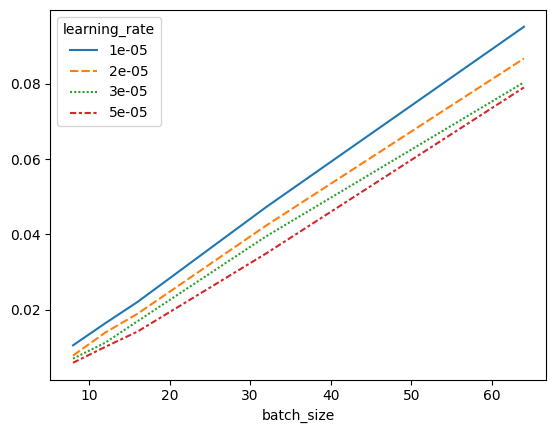

In [ ]:
# df.pivot_table("train_loss", index="batch_size", columns="epoch")
sns.lineplot(df.pivot_table("train_loss", index="batch_size", columns="learning_rate"))
plt.show()

In [ ]:
df.pivot_table("val_f1", index="batch_size", columns="learning_rate")


learning_rate,0.00001,0.00002,0.00003,0.00005
batch_size,,,,
8,0.520028,0.738285,0.826715,0.869408
12,0.427065,0.642209,0.743243,0.857169
16,0.426024,0.587445,0.759086,0.798104
32,0.233890,0.488532,0.478817,0.673709
64,0.213279,0.102280,0.283535,0.332741


In [ ]:
df.pivot_table("train_loss", index="num_train_epochs", columns="batch_size")

batch_size,8,12,16,32,64
num_train_epochs,,,,,
2,0.397769,0.275991,0.179460,0.116576,0.128838
3,0.562559,0.474716,0.467968,0.417302,0.078054
4,0.648343,0.577810,0.592837,0.345786,0.245330
5,0.806255,0.681425,0.727027,0.416070,0.259265
6,0.839503,0.802935,0.776245,0.535925,0.180425
8,0.914928,0.903223,0.852483,0.698947,0.505840


The larger the batch size, the more epochs we need

In [ ]:
df.pivot_table("val_loss", index="num_train_epochs", columns="learning_rate")

learning_rate,0.00001,0.00002,0.00003,0.00005
num_train_epochs,,,,
2,0.444884,0.431269,0.494920,0.402652
3,0.452277,0.549296,0.494995,0.554287
4,0.437840,0.561055,0.549247,0.544104
5,0.502723,0.529620,0.537557,0.613458
6,0.490882,0.557319,0.578167,0.610236
8,0.562151,0.570526,0.598490,0.583137


The larger the learning_rate, the less epochs we need

In [ ]:
df.pivot_table("test_f1", index="num_train_epochs", columns="learning_rate")

learning_rate,0.00001,0.00002,0.00003,0.00005
num_train_epochs,,,,
2,0.444884,0.431269,0.494920,0.402652
3,0.452277,0.549296,0.494995,0.554287
4,0.437840,0.561055,0.549247,0.544104
5,0.502723,0.529620,0.537557,0.613458
6,0.490882,0.557319,0.578167,0.610236
8,0.562151,0.570526,0.598490,0.583137


In [ ]:
df.pivot_table("val_f1", index="num_train_epochs", columns="learning_rate")

learning_rate,0.00001,0.00002,0.00003,0.00005
num_train_epochs,,,,
2,0.187801,0.103042,0.262815,0.368967
3,0.253235,0.422490,0.476080,0.630595
4,0.248223,0.557739,0.641010,0.715490
5,0.397212,0.583765,0.743380,0.796062
6,0.522570,0.625181,0.701280,0.831862
8,0.675820,0.778283,0.885111,0.894382


Learning curve plots

dont gridsearch epoch